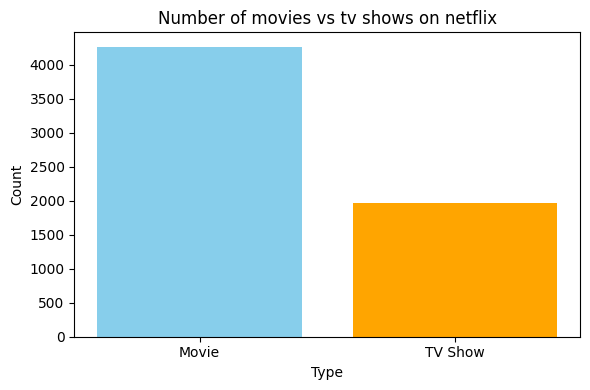

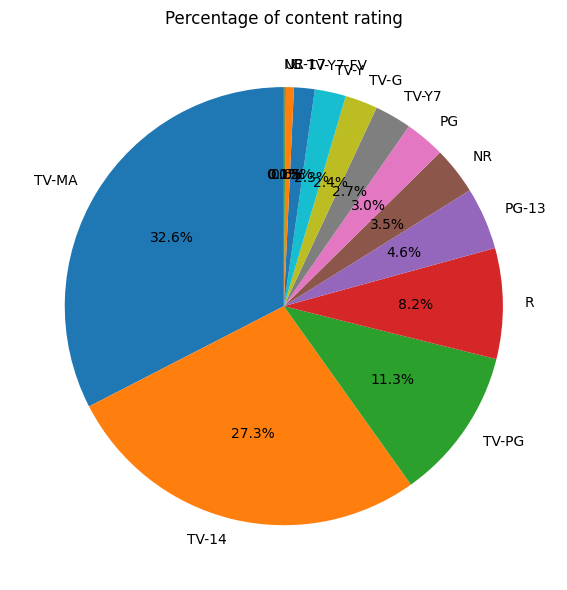

Number of movies after cleaning: 0


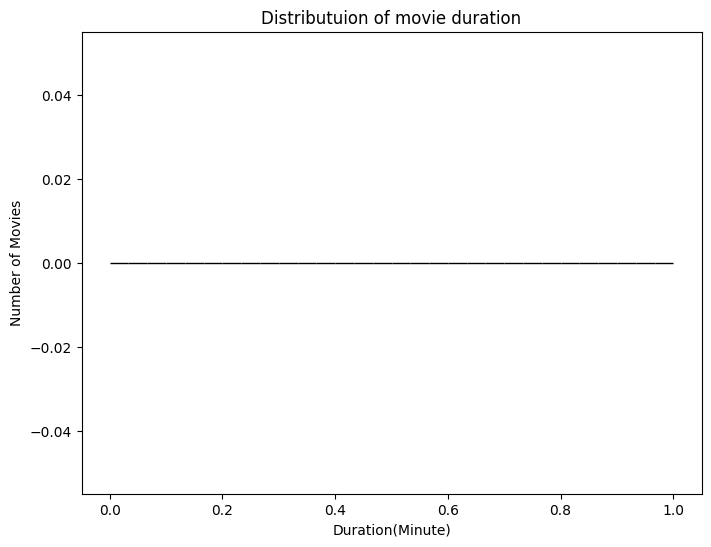

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
#load data
df = pd.read_csv("netflix_titles.csv")

#clean data
# df = df.dropna(subset=["type","release_year","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"])

type_counts=df["type"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=["skyblue","orange"])
plt.title("Number of movies vs tv shows on netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")
plt.show()

rating_counts = df["rating"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct="%1.1f%%",startangle=90)
plt.title("Percentage of content rating")
plt.tight_layout()
plt.savefig("content_ratings_pie.png")
plt.show()


movie_df = df[df["type"]=="movie"].copy()
movie_df["duration"]=movie_df["duration"].str.replace("min","").astype(int)

print("Number of movies after cleaning:", len(movie_df))
# The number is 0 because the dropna() call removes any row with a missing value in any of the listed columns.
# If even one column among ["type","release_year","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"] is NaN, that row is dropped.
# As a result, it's likely that no movie rows have all these fields completely filled, so movie_df ends up empty after filtering.
plt.figure(figsize=(8,6))
plt.hist(movie_df["duration"],bins=30,color="purple",edgecolor="black")
plt.title("Distributuion of movie duration")
plt.xlabel("Duration(Minute)")
plt.ylabel("Number of Movies")
plt.savefig("movie_duration_histogram.png")
plt.show()

df.columns